In [1]:
from draw3d import *

In [2]:
vertices = (
    (0, 0, -1), # bottom point -Z
    (1, 0, 0), (0, 1, 0), (0, -1, 0), (-1, 0, 0), # plane XOY
    (0, 0, 1) # top point +Z
)

face_point_ies = (
    (0, 1, 2), (0, 1, 3), (0, 3, 4), (0, 2, 4), # bottom faces
    (1, 2, 5), (1, 3, 5), (3, 4, 5), (2, 4, 5)  # top faces
)

In [3]:
def subtract(v1, v2):
    return tuple( v1 - v2 for (v1, v2) in zip(v1, v2) )

def cross(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

def face_point_coords(vertices, face_point_i):
    return [ vertices[fp_i] for fp_i in face_point_i]


def normal(face_points):
    u = subtract(face_points[1], face_points[0])
    v = subtract(face_points[2], face_points[0])
    
    return ( cross(u, v) )

def magnitude(v):
    return sqrt(sum([coord ** 2 for coord in v]))

def scale(scalar, vector):
    return tuple(scalar * coord for coord in vector)

def unit(vector):
    return scale(1./magnitude(vector), vector)


In [4]:
face_coords = [face_point_coords(vertices, fp_i)for fp_i in face_point_ies]
# print('face coords:')
# print(face_coords)

face_normals = [normal(fc) for fc in face_coords]
# print('normals:')
# print(face_normals)

len_normals: 8


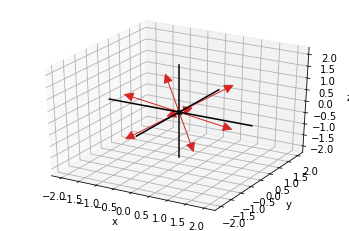

In [5]:
len_normals = len(face_normals)
print('len_normals:', len_normals)

normal = [Arrow3D(norm_vec) for norm_vec in face_normals]

draw3d(*normal)

In [6]:
face_unit_normals = [unit(nolmal) for nolmal in face_normals]
print('unit normals:')
print(face_unit_normals)

unit normals:
[(-0.5773502691896258, -0.5773502691896258, 0.5773502691896258), (0.5773502691896258, -0.5773502691896258, -0.5773502691896258), (-0.5773502691896258, -0.5773502691896258, -0.5773502691896258), (0.5773502691896258, -0.5773502691896258, 0.5773502691896258), (0.5773502691896258, 0.5773502691896258, 0.5773502691896258), (-0.5773502691896258, 0.5773502691896258, -0.5773502691896258), (0.5773502691896258, 0.5773502691896258, -0.5773502691896258), (-0.5773502691896258, 0.5773502691896258, 0.5773502691896258)]


len unit_normal: 8


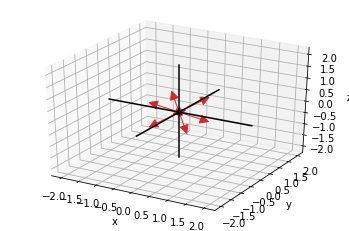

In [7]:
len_unit = len(face_unit_normals)
print('len unit_normal:', len_unit)

units = [Arrow3D(unit) for unit in face_unit_normals]

draw3d(*units)